<a href="https://colab.research.google.com/github/heishi1HUMANITY/machine_learning_practice/blob/master/tmp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

best params: {'lasso__alpha': 30, 'polynomialfeatures__degree': 4}
prediction: [13883.8442517]


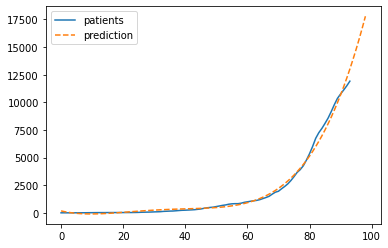

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso

# データの読み込み
data = pd.read_csv('https://raw.githubusercontent.com/heishi1HUMANITY/machine_learning_practice/master/patient.csv')
X = np.arange(len(data))[:,np.newaxis]
y = np.array(data['total_confirmed_cases'])

# 曜日の追加
# day = ['Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Mon'] 
# days = pd.DataFrame([day[i % 7] for i in range(len(data) + 5)], columns=['day_of_the_week'])
# days_dummied = pd.get_dummies(days)
# X = np.hstack([X, np.array(days_dummied[:len(data)])])

# pipelineの構築
pipe = make_pipeline(StandardScaler(), PolynomialFeatures(), Lasso(max_iter=10000))

# GridSearch
param_grid = {
    'polynomialfeatures__degree': [1, 2, 3, 4, 5],
    'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 20, 30, 40, 50]
}
grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
grid.fit(X, y)

print(f'best params: {grid.best_params_}')
print(f'prediction: {grid.predict(np.array([len(data)])[:, np.newaxis])}')
# print(f'prediction: {grid.predict(np.hstack([np.array([len(data)]), np.array(days_dummied)[len(data)]]).reshape(1,8))}')

x = np.arange(0, len(data) + 5)[:, np.newaxis]
# x = np.hstack([x, np.array(days_dummied)])

plt.plot(X[:, 0], y, label='patients')
plt.plot(x[:, 0], grid.predict(x), linestyle='dashed', label='prediction')
plt.legend(loc='best')
plt.show()
